## Exact day & time

In [2]:
import time
import numpy as np
from matplotlib import pyplot
from matplotlib import pyplot as plt
import pickle
import pandas as pd

In [3]:
data_list=['Barclays-Noida-3.2-Jan', 'Barclays-Noida-3.2-Feb', 'Barclays-Noida-3.2-March','Barclays-Noida-3.2-April']

for month in range(len(data_list)):
    month_data=pickle.load(open('processed_data/'+data_list[month]+'.p', "rb" ))
    if month==0:
        data=month_data.copy()
    else:
        data=pd.concat([data,month_data])

In [5]:
seat_data=data.loc[data['seatName']=='B5_9_1_05']
seat_data=seat_data.sort_values(['Datetime'])
seat_data=seat_data.drop(['Country','Location','Resource Type','floor','Department','seatName'],axis=1)
seat_data.set_index('Datetime',inplace=True)
seat_data.index.freq='10T'

In [12]:
date_split='2018-04-24'
train,test=seat_data.loc[seat_data.index<date_split],seat_data.loc[seat_data.index>=date_split]

In [13]:
from sklearn.metrics import log_loss,mean_squared_log_error,r2_score,mean_squared_error
from math import sqrt
def metric_scores(y_true,y_pred):
   # acc=accuracy_score(y_true,y_pred)
    log=log_loss(y_true,y_pred)
    msle=mean_squared_log_error(y_true,y_pred)
    rmse = sqrt(mean_squared_error(y_true,y_pred))
    r2=r2_score(y_true,y_pred)
    print('log',log)
    print('msle',msle)
    print('rmse',rmse)

### Mean

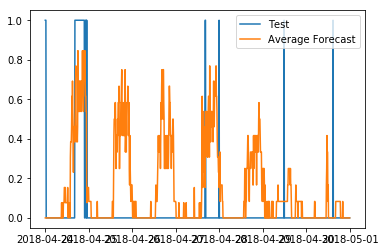

In [15]:
y_hat_avg=test.copy()
pred_list=[]
for i in range(7):
    day_seat_data= train.loc[train.index.weekday==i]
    daterange = pd.date_range('00:00', '23:50',freq='10T')
    for date in daterange:
        list_index=day_seat_data.index.indexer_at_time(date, asof=False)
        day_min_seat_data=day_seat_data.iloc[list_index]
        pred_list.append(day_min_seat_data['Space'].mean())
        
y_hat_avg['avg_forecast'] =pred_list
#plt.figure(figsize=(12,8))
#plt.plot(train['Space'], label='Train')
plt.plot(test['Space'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [16]:
metric_scores(test['Space'],y_hat_avg['avg_forecast'])

log 0.3307762850001962
msle 0.03982601374106425
rmse 0.2550926252639899


### Moving Average

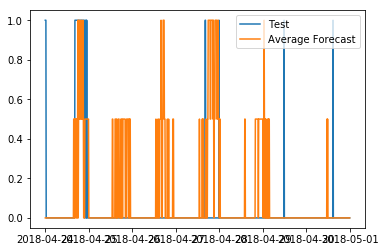

In [29]:
y_hat_avg=test.copy()
pred_list=[]
for i in range(7):
    day_seat_data= train.loc[train.index.weekday==i]
    daterange = pd.date_range('00:00', '23:50',freq='10T')
    for date in daterange:
        list_index=day_seat_data.index.indexer_at_time(date, asof=False)
        day_min_seat_data=day_seat_data.iloc[list_index]
        pred_list.append(day_min_seat_data['Space'].rolling(2).mean().iloc[-1])
        
y_hat_avg['avg_forecast'] =pred_list
#plt.figure(figsize=(12,8))
#plt.plot(train['Space'], label='Train')
plt.plot(test['Space'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [18]:
metric_scores(test['Space'],y_hat_avg['avg_forecast'])

log 1.6087519694879548
msle 0.04308460051169331
rmse 0.28303555780877954


### Exponential Smoothing

C:\Users\ndrs\Anaconda3\lib\site-packages\statsmodels-0.8.0-py3.6-win-amd64.egg\statsmodels\tsa\holtwinters.py:734: RuntimeWarning: divide by zero encountered in log
  aic = self.nobs * np.log(sse / self.nobs) + (k) * 2
C:\Users\ndrs\Anaconda3\lib\site-packages\statsmodels-0.8.0-py3.6-win-amd64.egg\statsmodels\tsa\holtwinters.py:736: RuntimeWarning: divide by zero encountered in log
  bic = self.nobs * np.log(sse / self.nobs) + (k) * np.log(self.nobs)


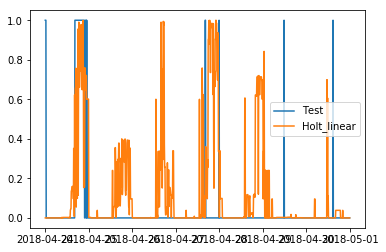

In [20]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg=test.copy()
pred_list=[]
for i in range(7):
    day_seat_data= train.loc[train.index.weekday==i]
    daterange = pd.date_range('00:00', '23:50',freq='10T')
    for date in daterange:
        list_index=day_seat_data.index.indexer_at_time(date, asof=False)
        day_min_seat_data=day_seat_data.iloc[list_index]
        fit2 = SimpleExpSmoothing(np.asarray(day_min_seat_data['Space'])).fit(smoothing_level=0.6,optimized=False)
        pred_list.append(fit2.forecast(1))
        
y_hat_avg['SES'] =pred_list
#plt.plot(train['Space'], label='Train')
plt.plot(test['Space'], label='Test')
plt.plot(y_hat_avg['SES'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [21]:
metric_scores(test['Space'],y_hat_avg['SES'])

log 0.4003540934667064
msle 0.04077786349430448
rmse 0.27458030840707515


### Holts Winter

C:\Users\ndrs\Anaconda3\lib\site-packages\statsmodels-0.8.0-py3.6-win-amd64.egg\statsmodels\tsa\holtwinters.py:734: RuntimeWarning: divide by zero encountered in log
  aic = self.nobs * np.log(sse / self.nobs) + (k) * 2
C:\Users\ndrs\Anaconda3\lib\site-packages\statsmodels-0.8.0-py3.6-win-amd64.egg\statsmodels\tsa\holtwinters.py:736: RuntimeWarning: divide by zero encountered in log
  bic = self.nobs * np.log(sse / self.nobs) + (k) * np.log(self.nobs)


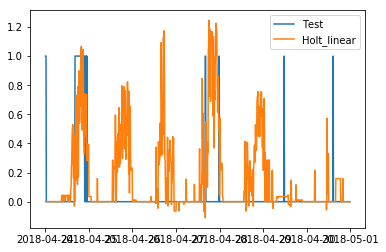

In [23]:
y_hat_avg=test.copy()
pred_list=[]
for i in range(7):
    day_seat_data= train.loc[train.index.weekday==i]
    daterange = pd.date_range('00:00', '23:50',freq='10T')
    for date in daterange:
        list_index=day_seat_data.index.indexer_at_time(date, asof=False)
        day_min_seat_data=day_seat_data.iloc[list_index]
        fit1 = Holt(np.asarray(day_min_seat_data['Space'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
        pred_list.append(fit1.forecast(1))
        
y_hat_avg['Holt_linear'] =pred_list
#plt.plot(train['Space'], label='Train')
plt.plot(test['Space'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [40]:
metric_scores(test['Space'],y_hat_avg['Holt_linear'])

log 2.624261183535119
msle 0.07494968281147395
rmse 0.40017371085974995
